# **K Nearest Neighbors (KNN)**



### **Import Necessary Modules**

In [ ]:
#Standard Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Specific to project
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from math import sqrt

## **Part 1**



*   Use KNN to create a classification model using the same dataset as in the lecture to predict the Activity Level of ID 15.  See below for the raw data which you can copy/paste into your Colab script
    *   Use 158 for the ‘Weight’ feature
    *   Create a document with a plot of your independent features (Weight vs. AvgSleep), a plot of your RMSE vs. K, and identify your best K value
    *   Predict the Activity Level of ID 15.



```
PhysicalStats = {'Height': [5.0,5.9,5.5,5.8,4.7,5.7,5.3,5.7,5.4,5.5,6.2,6.0,5.8,4.9],
                 'Age': [45,26,30,34,40,36,19,22,23,32,35,25,18,20],
                 'Gender': [0,1,1,0,1,1,0,0,0,1,0,1,0,0],
                 'ActivityLevel': [1,4,2,4,3,2,4,2,2,3,4,1,1,0],
                 'AvgSleep': [6.5,7.0,8.1,6.6,7.2,5.4,6.9,7.5,9.0,6.3,7.2,6.1,5.5,7.3],
                 'Weight': [170,104,121,130,159,132,88,132,99,128,181,168,145,110]
                } 

  Input = {'Height': [5.3],
           'Age': [39],
           'Gender': [1],
           'ActivityLevel': [???],
           'AvgSleep': [6.1],
           'Weight': [158]
           }#   --> result should be ActivityLevel = 2
```



K = 1       Score = -3.875
K = 2       Score = -4.71875
K = 3       Score = -3.583333333333333
K = 4       Score = -2.140625
K = 5       Score = -1.73
K = 6       Score = -2.010416666666667
K = 7       Score = -1.7933673469387759
K = 8       Score = -2.01171875
K = 9       Score = -1.8425925925925926

 
Lowest RMSE and K value: RMSE=1.557776192739723     K=5

 
Predicted Activity Level: 2.0

 
 



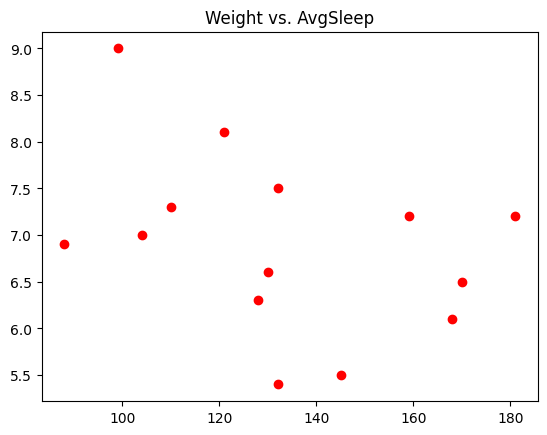

<Axes: >

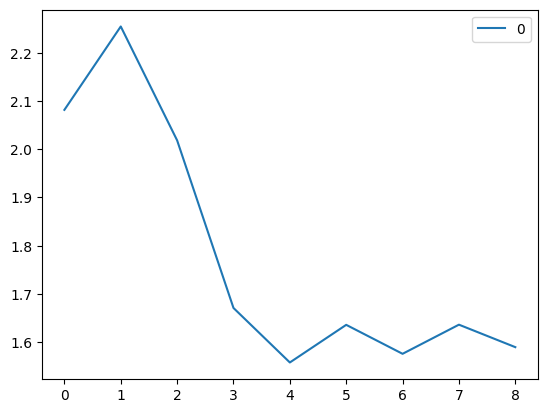

In [ ]:
#Convert the Physiscal Stats Dictionary into a Pandas DataFrame
PhysicalStats = {'Height': [5.0,5.9,5.5,5.8,4.7,5.7,5.3,5.7,5.4,5.5,6.2,6.0,5.8,4.9],
                 'Age': [45,26,30,34,40,36,19,22,23,32,35,25,18,20],
                 'Gender': [0,1,1,0,1,1,0,0,0,1,0,1,0,0],
                 'ActivityLevel': [1,4,2,4,3,2,4,2,2,3,4,1,1,0],
                 'AvgSleep': [6.5,7.0,8.1,6.6,7.2,5.4,6.9,7.5,9.0,6.3,7.2,6.1,5.5,7.3],
                 'Weight': [170,104,121,130,159,132,88,132,99,128,181,168,145,110]
                } 

Input = {'Height': [5.3],
         'Age': [39],
         'Gender': [1],
         'ActivityLevel': ['???'],
         'AvgSleep': [6.1],
         'Weight': [158]
         } #   --> result should be ActivityLevel = 2

PhysicalStats_DataFrame = pd.DataFrame(PhysicalStats)
testForActiviy = pd.DataFrame(Input)

#Split the Data into training and testing splits
x = PhysicalStats_DataFrame[['AvgSleep', 'Weight']]
y = PhysicalStats_DataFrame[['ActivityLevel']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_xTrain = scaler.fit_transform(x_train)
x_train = pd.DataFrame(scaled_xTrain)
scaled_xTest = scaler.fit_transform(x_test)
x_test = pd.DataFrame(scaled_xTest)



#Running the KNN Regressor
num_of_K = 10
mse = np.zeros((num_of_K - 1))
rmse = np.zeros((num_of_K - 1))

for nums in range(1, num_of_K):
  KNN = KNeighborsRegressor(n_neighbors=nums)
  KNN.fit(x_train, y_train)
  yHat = KNN.predict(x_test)

  print(f"K = {nums}       Score = {KNN.score(x_test, y_test)}")
  mse[nums -1] = (((yHat - y_test) ** 2).sum()) / len(yHat)
  rmse[nums - 1] = sqrt(mean_squared_error(y_test, yHat))


K = rmse.argmin() + 1
print("\n \nLowest RMSE and K value: RMSE={}     K={}".format(rmse.min(), K))


# Find your unknown Activity level

dist = np.full((14, 2), 0.0)
for n in range(1, len(PhysicalStats_DataFrame)+1):
  dist[n-1, 0] = n
  dist[n-1, 1] = sqrt((testForActiviy['AvgSleep'] - PhysicalStats_DataFrame['AvgSleep'][n-1])**2 +\
                      (testForActiviy['Weight'] - PhysicalStats_DataFrame['Weight'][n-1])**2)
sortedDist = dist[dist[:, 1].argsort()]
predActivity = PhysicalStats_DataFrame['ActivityLevel'][sortedDist[0:K, 0]-1].sum() / K

print(f"\n \nPredicted Activity Level: {predActivity}")


print("\n \n \n")

plt.scatter(PhysicalStats_DataFrame[['Weight']], PhysicalStats_DataFrame[['AvgSleep']], c='red')
plt.title("Weight vs. AvgSleep")
plt.show()

curve = pd.DataFrame(rmse) #elbow curve
curve.plot()
# plt.show()

## **Part 2**



*   Use the provided dataset, ‘BreastCancerDataset_KNN_test.csv’ and predict a patient’s ‘Result’ for the following feature measurements.  Record the Result and your best K value.
    *   Mount drive

  ```
  input_1 = np.array([7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039])

  input_2 = np.array([19.81,22.15,130,1260,0.09831,0.1027,0.1479,0.09498,0.1582,0.05395,0.7582,1.017,5.865,112.4,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.8,2398,0.1512,0.315,0.5372,0.2388,0.2768,0.07615])

  ```

      Follow the same procedure to preprocess, train, and make predictions.  Round your result since it should be a one-hot output.

In [ ]:
#Mount drive to go to the read in the Brest Cancer dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/ML_S23-Mauro/MachineLearning/K_Nearest_Neighbors_KNN/

Mounted at /content/drive
/content/drive/MyDrive/ML_S23-Mauro/MachineLearning/K_Nearest_Neighbors_KNN


In [ ]:
input_1 = np.array([7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039])
input_2 = np.array([19.81,22.15,130,1260,0.09831,0.1027,0.1479,0.09498,0.1582,0.05395,0.7582,1.017,5.865,112.4,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.8,2398,0.1512,0.315,0.5372,0.2388,0.2768,0.07615])
testData = pd.concat([pd.Series(input_1), pd.Series(input_2)], axis=1).transpose().set_axis(list(breastCancerDF.columns), axis="columns")

testData.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039
1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.1479,0.09498,0.1582,0.05395,...,27.320,30.88,186.80,2398.0,0.15120,0.31500,0.5372,0.2388,0.2768,0.07615


K = 1       Score = 0.6289330922242315
K = 2       Score = 0.752622061482821
K = 3       Score = 0.7663652802893309
K = 4       Score = 0.7912748643761303
K = 5       Score = 0.8086943942133815
K = 6       Score = 0.8053044002411092
K = 7       Score = 0.8249843156068938
K = 8       Score = 0.8389466546112117
K = 9       Score = 0.8345723662179358
K = 10       Score = 0.83425678119349
K = 11       Score = 0.8221332177603755
K = 12       Score = 0.8287823990355636
K = 13       Score = 0.8297142001134212
K = 14       Score = 0.822460050928147
K = 15       Score = 0.8222543701024714
K = 16       Score = 0.8331487341772152
K = 17       Score = 0.8308014791918257
K = 18       Score = 0.8275735047886947
K = 19       Score = 0.8240030455886552
K = 20       Score = 0.8234339963833635
K = 21       Score = 0.8240494027629135
K = 22       Score = 0.8233258111278825
K = 23       Score = 0.8214420739940589
K = 24       Score = 0.8225550030138638
K = 25       Score = 0.8258459312839059
K = 26       

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


<Axes: >

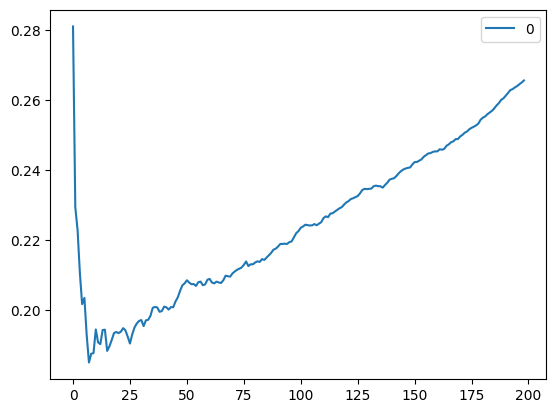

In [ ]:
#Put breast cancer dataset in a Pandas Dataframe
breastCancerDF = pd.read_csv('BreastCancerDataset_KNN_test.csv')
del breastCancerDF[breastCancerDF.columns[0]]
result = breastCancerDF[['Result']]
breastCancerDF.drop('Result', axis=1, inplace=True)


#Make test Datasets
input_1 = np.array([7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039])
input_2 = np.array([19.81,22.15,130,1260,0.09831,0.1027,0.1479,0.09498,0.1582,0.05395,0.7582,1.017,5.865,112.4,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.8,2398,0.1512,0.315,0.5372,0.2388,0.2768,0.07615])

testData = np.array([input_1, input_2])






#Split the Data into training and testing splits
x = breastCancerDF
y = result

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_xTrain = scaler.fit_transform(x_train)
x_train = pd.DataFrame(scaled_xTrain)
scaled_xTest = scaler.fit_transform(x_test)
x_test = pd.DataFrame(scaled_xTest)

#Running the KNN Regressor
num_of_K = 200
mse = np.zeros((num_of_K - 1))
rmse = np.zeros((num_of_K - 1))

for nums in range(1, num_of_K):
  KNN = KNeighborsRegressor(n_neighbors=nums)
  KNN.fit(x_train, y_train)
  yHat = KNN.predict(x_test)

  print(f"K = {nums}       Score = {KNN.score(x_test, y_test)}")
  mse[nums -1] = (((yHat - y_test) ** 2).sum()) / len(yHat)
  rmse[nums - 1] = sqrt(mean_squared_error(y_test, yHat))


K = rmse.argmin() + 1
print("\n \nLowest RMSE and K value: RMSE={}     K={}".format(rmse.min(), K))

# Find your unknown result

scaled_testData = scaler.transform(testData)
testData = pd.DataFrame(scaled_testData)

for i, row in testData.iterrows():
    input = row.to_numpy().reshape(1, -1)
    KNN = KNeighborsRegressor(n_neighbors=K)
    KNN.fit(x_train, y_train)
    predResult = KNN.predict(input)
    predResult = round(predResult.sum())
    print(f"Predicted Result for row {i+1}: {predResult}")


print("\n \n \n")
curve = pd.DataFrame(rmse) #elbow curve
curve.plot()
# plt.show()
